In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.CAMVID_TINY)

In [4]:
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/labels')]

In [5]:
(path/'images').ls()

(#100) [Path('/root/.fastai/data/camvid_tiny/images/0001TP_006750.png'),Path('/root/.fastai/data/camvid_tiny/images/0001TP_006840.png'),Path('/root/.fastai/data/camvid_tiny/images/0016E5_06990.png'),Path('/root/.fastai/data/camvid_tiny/images/0016E5_08137.png'),Path('/root/.fastai/data/camvid_tiny/images/0016E5_05310.png'),Path('/root/.fastai/data/camvid_tiny/images/0016E5_01500.png'),Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f00480.png'),Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f01440.png'),Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f02070.png'),Path('/root/.fastai/data/camvid_tiny/images/0001TP_008700.png')...]

In [6]:
(path/'labels').ls()

(#100) [Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f04950_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_08280_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f03660_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0006R0_f02610_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0006R0_f03630_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_08057_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_06990_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_06870_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_08550_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_07995_P.png')...]

In [7]:
o1 = (path/'images'/'0001TP_006750.png')

In [8]:
from PIL import Image

In [9]:
im1 = Image.open(o1)

In [10]:
im1.size

(128, 96)

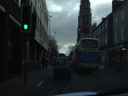

In [11]:
display(im1)

In [12]:
l1 = path/'labels'/f'{o1.stem}_P{o1.suffix}'

In [13]:
iml1 = Image.open(l1)

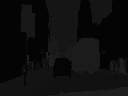

In [14]:
display(iml1)

In [15]:
with open(path/'codes.txt', 'r') as f:
    texts = f.readlines()
    print(texts)

['Animal\n', 'Archway\n', 'Bicyclist\n', 'Bridge\n', 'Building\n', 'Car\n', 'CartLuggagePram\n', 'Child\n', 'Column_Pole\n', 'Fence\n', 'LaneMkgsDriv\n', 'LaneMkgsNonDriv\n', 'Misc_Text\n', 'MotorcycleScooter\n', 'OtherMoving\n', 'ParkingBlock\n', 'Pedestrian\n', 'Road\n', 'RoadShoulder\n', 'Sidewalk\n', 'SignSymbol\n', 'Sky\n', 'SUVPickupTruck\n', 'TrafficCone\n', 'TrafficLight\n', 'Train\n', 'Tree\n', 'Truck_Bus\n', 'Tunnel\n', 'VegetationMisc\n', 'Void\n', 'Wall\n']


In [16]:
# birds = DataBlock(
#                    blocks=(ImageBlock, CategoryBlock),
#                    get_items=get_image_files,
#                    # splitter=RandomSplitter(valid_pct=0.2, seed=42),
#                    get_y=parent_label,
#                    item_tfms=Resize(200),
#                    batch_tfms = aug_transforms(size=128, min_scale=0.75)
# )

In [17]:
# dls = birds.dataloaders(path)

In [18]:
dls = SegmentationDataLoaders.from_label_func(
            path, bs=8, fnames = get_image_files(path/"images"),
            label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
            codes = np.loadtxt(path/'codes.txt', dtype=str)
)

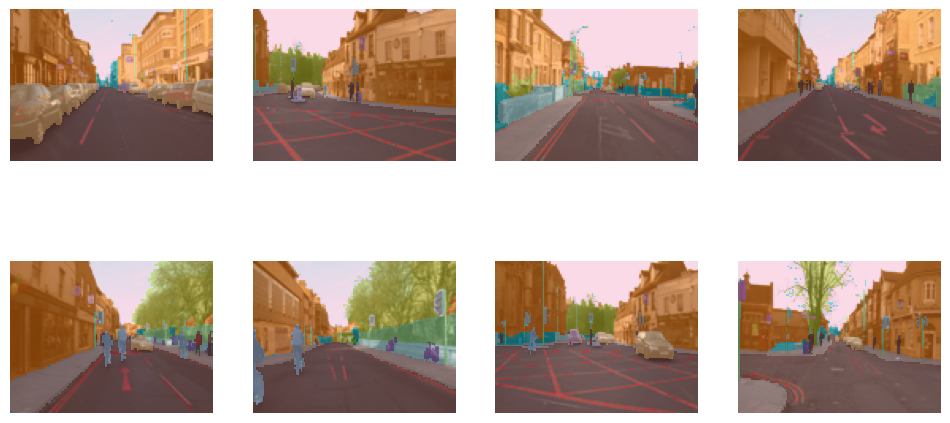

In [19]:
dls.show_batch(max_n=9)

In [20]:
learn = unet_learner(dls, resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 165MB/s]


SuggestedLRs(valley=9.120108734350652e-05)

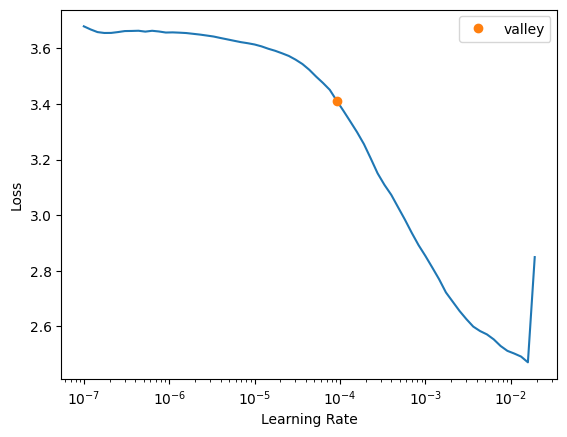

In [21]:
learn.lr_find()

In [22]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,time
0,3.385663,2.534316,00:01


epoch,train_loss,valid_loss,time
0,1.983564,1.731670,00:01
1,1.724731,1.412091,00:01
2,1.527052,1.176550,00:01
3,1.361653,0.988925,00:01
4,1.221598,0.954223,00:01
5,1.099370,0.876830,00:01
6,1.002205,0.841330,00:01
7,0.923290,0.842565,00:01
8,0.855917,0.817543,00:01
9,0.792971,0.793143,00:01


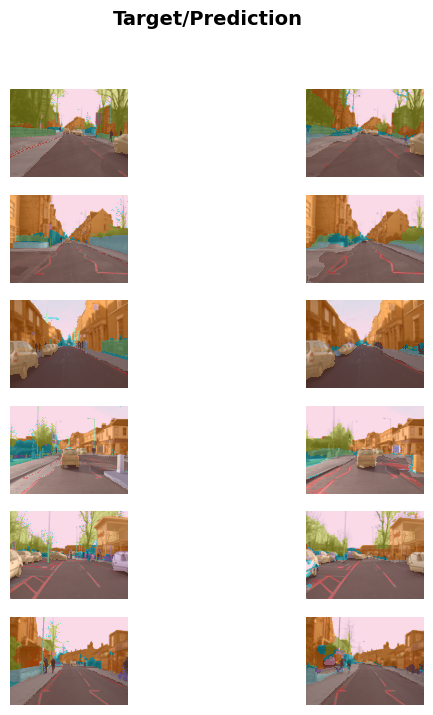

In [23]:
learn.show_results(max_n=6, figsize=(7,8))

In [24]:
from fastai.callback.fp16 import *
learn50 = unet_learner(dls, resnet50).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 162MB/s]


In [25]:
learn50.fine_tune(8)

epoch,train_loss,valid_loss,time
0,88.133224,138.407745,00:04


epoch,train_loss,valid_loss,time
0,141.346024,2.983920,00:04
1,65.106186,2.430303,00:04
2,39.717209,1.881868,00:04
3,27.170490,1.473402,00:04
4,19.742199,1.257493,00:04
5,14.903922,1.159683,00:04
6,11.558113,1.089534,00:04
7,9.154773,1.084636,00:04


In [26]:
learn50.fine_tune(8)

epoch,train_loss,valid_loss,time
0,1.847778,2.420632,00:04


epoch,train_loss,valid_loss,time
0,1.720807,1.145369,00:04
1,1.385141,1.135965,00:04
2,1.214836,0.888669,00:04
3,1.078546,0.841081,00:04
4,0.970442,0.763375,00:04
5,0.881529,0.775125,00:04
6,0.811469,0.700422,00:04
7,0.754173,0.702204,00:04


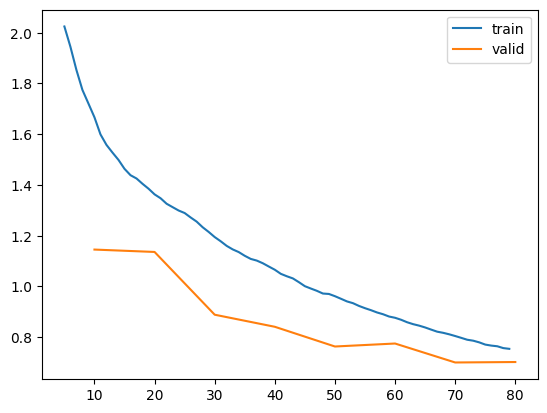

In [27]:
learn50.recorder.plot_loss()

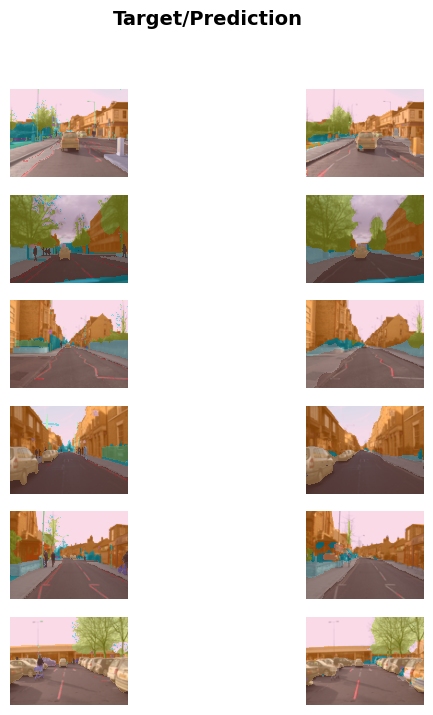

In [28]:
learn50.show_results(max_n=6, figsize=(7,8))